In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv('megaGymDataset.csv')
df = df.dropna(subset=['BodyPart', 'Rating', 'Desc'])

df['BodyPart'] = df['BodyPart'].str.lower()

bodypart_groups = {
    'arm': ['biceps', 'triceps', 'forearms', 'shoulders'],
    'leg': ['quadriceps', 'hamstrings', 'calves', 'adductors', 'abductors'],
    'back': ['lats', 'lower back', 'middle back', 'traps'],
    'chest': ['chest'],
    'abdomen': ['abdominals'],
    'neck': ['neck'],
    'glutes': ['glutes']
}

le_bodypart = LabelEncoder()
df['BodyPart_encoded'] = le_bodypart.fit_transform(df['BodyPart'])

le_equipment = LabelEncoder()
df['Equipment_encoded'] = le_equipment.fit_transform(df['Equipment'])

X = df[['BodyPart_encoded', 'Equipment_encoded', 'Rating']]

knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn.fit(X)

user_input = input("Enter what you want to train (e.g., arm, leg, back, etc.): ").lower()

if user_input in bodypart_groups:
    related_bodyparts = bodypart_groups[user_input]
elif user_input in le_bodypart.classes_:
    related_bodyparts = [user_input]
else:
    related_bodyparts = []

if related_bodyparts:
    filtered_df = df[df['BodyPart'].isin(related_bodyparts)]

    if not filtered_df.empty:
        avg_bodypart_encoded = filtered_df['BodyPart_encoded'].mode()[0]
        
        distances, indices = knn.kneighbors([[avg_bodypart_encoded, 0, 0]])

        recommended_exercises = df.iloc[indices[0]]

        recommended_exercises[['Title', 'Desc', 'Rating', 'BodyPart']].to_excel('recommended_exercises.xlsx', index=False)

        print("Recommendations have been saved to 'recommended_exercises.xlsx'.")
    else:
        print("No exercises found for this category.")
else:
    print("Invalid input. Please try again with a valid body part or group (e.g., 'arm', 'leg', 'back').")

Invalid input. Please try again with a valid body part or group (e.g., 'arm', 'leg', 'back').


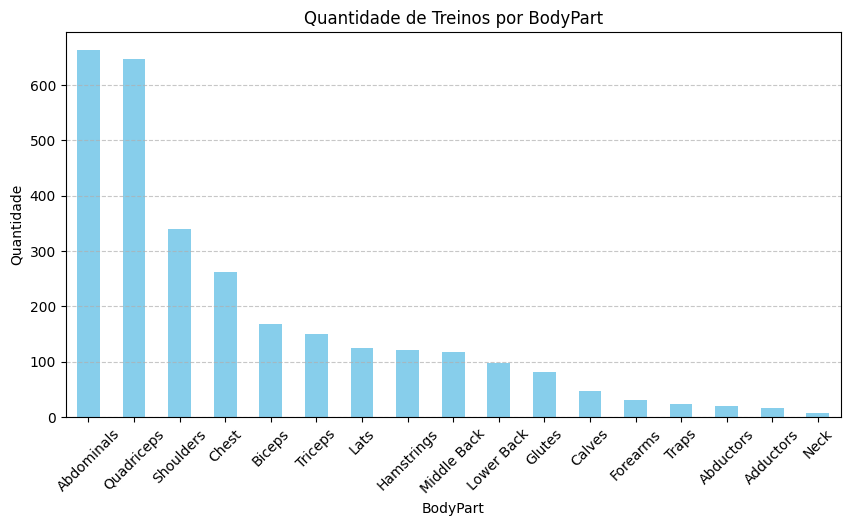

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_counts = df["BodyPart"].value_counts()

df_counts.plot(kind="bar", figsize=(10, 5), color="skyblue")

plt.title("Quantidade de Treinos por BodyPart")
plt.xlabel("BodyPart")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [7]:
body_parts = df["BodyPart"].unique()
print(body_parts)

['Abdominals' 'Adductors' 'Abductors' 'Biceps' 'Calves' 'Chest' 'Forearms'
 'Glutes' 'Hamstrings' 'Lats' 'Lower Back' 'Middle Back' 'Traps' 'Neck'
 'Quadriceps' 'Shoulders' 'Triceps']
